**Yogendra verma(1814)**

In [739]:
### NLP_Assign_7_1st_Part.ipynb

In [740]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [741]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


In [742]:
# importing simple_preprocess
from gensim.utils import simple_preprocess
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [743]:
text = open(r'/content/drive/My Drive/NLP/atma_nirbhar_bharat.txt', encoding="utf-8").read()

In [744]:
text

'The government announced the “Atma Nirbhar Bharat Abhiyan” so as to revive every sphere of the economy from demand, supply to manufacturing, and make India self-reliant to sustain and tackle any Black Swan event in the future.\nThe package is divided into four tranches, where each tranche has their own focus areas.\nThe package’ score focus is on MSMEs and agriculture and its allied activities.\nHowever, the package fails to bring optimism and confidence among the corporate as it focuses more on indirect benefits, with a major focus on loan disbursal.\n\nIt would have been for the benefit of the corporate if the government would have provided direct benefits like cash support and pause or reduction in GST payments.\nThis would have helped in reducing the prices of the products, thus leading to higher demand.\nThe world’s biggest lockdown imposed to contain the spread of COVID-19 has severely impacted the domestic economic activities as it brought nearly 70% of economic activity, inves

In [745]:
lower_case = text.lower()
lower_case

'the government announced the “atma nirbhar bharat abhiyan” so as to revive every sphere of the economy from demand, supply to manufacturing, and make india self-reliant to sustain and tackle any black swan event in the future.\nthe package is divided into four tranches, where each tranche has their own focus areas.\nthe package’ score focus is on msmes and agriculture and its allied activities.\nhowever, the package fails to bring optimism and confidence among the corporate as it focuses more on indirect benefits, with a major focus on loan disbursal.\n\nit would have been for the benefit of the corporate if the government would have provided direct benefits like cash support and pause or reduction in gst payments.\nthis would have helped in reducing the prices of the products, thus leading to higher demand.\nthe world’s biggest lockdown imposed to contain the spread of covid-19 has severely impacted the domestic economic activities as it brought nearly 70% of economic activity, inves

In [746]:
# make a dictionary of Contractions

contraction_mapping={
"ain't": "is not",
"aren't": "are not",
"can't": "can not",
"can't've": "can not have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [747]:
# function to pre-process the text
def cleaner(text):
    newString=re.sub(r"@[a-zA-Z0-9]+","",text)         # removing user mentions
    newString=re.sub("#","",newString) 
    newString=' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString=re.sub(r'http\S+','',newString)                  # remove URL's
    newString=re.sub(r"'s\b"," is",newString)         # removing 's
    newString=re.sub(r"’s\b"," is",newString)         # removing 's
    newString=re.sub(r'[%#@$&!+|ð¦±]','',newString)          # Remove spacial char
    newString=re.sub(r'[’,:;“”]','',newString)                   # remove punctuations mark  (Note:- leave dot '.' here )
    #newString=re.sub("[^a-zA-Z]"," ",newString)         # fetching out only char
    newString=re.sub(r'[\d]','',newString)               # remove numbers 
    #lower_case=letters_only.lower()                     # converting everything in lowercase
    words=newString.split()                            # split based on space to remove multiple spaces
    return (" ".join(words)).strip()

In [748]:
cleaned_text = cleaner(lower_case)
cleaned_text

'the government announced the atma nirbhar bharat abhiyan so as to revive every sphere of the economy from demand supply to manufacturing and make india self-reliant to sustain and tackle any black swan event in the future. the package is divided into four tranches where each tranche has their own focus areas. the package score focus is on msmes and agriculture and its allied activities. however the package fails to bring optimism and confidence among the corporate as it focuses more on indirect benefits with a major focus on loan disbursal. it would have been for the benefit of the corporate if the government would have provided direct benefits like cash support and pause or reduction in gst payments. this would have helped in reducing the prices of the products thus leading to higher demand. the world is biggest lockdown imposed to contain the spread of covid- has severely impacted the domestic economic activities as it brought nearly of economic activity investment exports and discr

In [749]:
sent_tokenized_text =nltk.sent_tokenize(cleaned_text)

In [750]:
sent_tokenized_text

['the government announced the atma nirbhar bharat abhiyan so as to revive every sphere of the economy from demand supply to manufacturing and make india self-reliant to sustain and tackle any black swan event in the future.',
 'the package is divided into four tranches where each tranche has their own focus areas.',
 'the package score focus is on msmes and agriculture and its allied activities.',
 'however the package fails to bring optimism and confidence among the corporate as it focuses more on indirect benefits with a major focus on loan disbursal.',
 'it would have been for the benefit of the corporate if the government would have provided direct benefits like cash support and pause or reduction in gst payments.',
 'this would have helped in reducing the prices of the products thus leading to higher demand.',
 'the world is biggest lockdown imposed to contain the spread of covid- has severely impacted the domestic economic activities as it brought nearly of economic activity inv

In [751]:
sent_tokenized_word = [nltk.word_tokenize(sentence) for sentence in sent_tokenized_text]

In [752]:
sent_tokenized_word

[['the',
  'government',
  'announced',
  'the',
  'atma',
  'nirbhar',
  'bharat',
  'abhiyan',
  'so',
  'as',
  'to',
  'revive',
  'every',
  'sphere',
  'of',
  'the',
  'economy',
  'from',
  'demand',
  'supply',
  'to',
  'manufacturing',
  'and',
  'make',
  'india',
  'self-reliant',
  'to',
  'sustain',
  'and',
  'tackle',
  'any',
  'black',
  'swan',
  'event',
  'in',
  'the',
  'future',
  '.'],
 ['the',
  'package',
  'is',
  'divided',
  'into',
  'four',
  'tranches',
  'where',
  'each',
  'tranche',
  'has',
  'their',
  'own',
  'focus',
  'areas',
  '.'],
 ['the',
  'package',
  'score',
  'focus',
  'is',
  'on',
  'msmes',
  'and',
  'agriculture',
  'and',
  'its',
  'allied',
  'activities',
  '.'],
 ['however',
  'the',
  'package',
  'fails',
  'to',
  'bring',
  'optimism',
  'and',
  'confidence',
  'among',
  'the',
  'corporate',
  'as',
  'it',
  'focuses',
  'more',
  'on',
  'indirect',
  'benefits',
  'with',
  'a',
  'major',
  'focus',
  'on',
  '

In [753]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","new","nep","rs","shall","."]

In [754]:
## Removing stop words from the tokenized words list
## final_words = [word for word in tokenized_text if word not in stop_words]

for i in range(len(sent_tokenized_word)):
    sent_tokenized_word[i] = [word for word in sent_tokenized_word[i]
                    if word not in stop_words]

In [755]:
sent_tokenized_word

[['government',
  'announced',
  'atma',
  'nirbhar',
  'bharat',
  'abhiyan',
  'revive',
  'every',
  'sphere',
  'economy',
  'demand',
  'supply',
  'manufacturing',
  'make',
  'india',
  'self-reliant',
  'sustain',
  'tackle',
  'black',
  'swan',
  'event',
  'future'],
 ['package', 'divided', 'four', 'tranches', 'tranche', 'focus', 'areas'],
 ['package', 'score', 'focus', 'msmes', 'agriculture', 'allied', 'activities'],
 ['however',
  'package',
  'fails',
  'bring',
  'optimism',
  'confidence',
  'among',
  'corporate',
  'focuses',
  'indirect',
  'benefits',
  'major',
  'focus',
  'loan',
  'disbursal'],
 ['would',
  'benefit',
  'corporate',
  'government',
  'would',
  'provided',
  'direct',
  'benefits',
  'like',
  'cash',
  'support',
  'pause',
  'reduction',
  'gst',
  'payments'],
 ['would',
  'helped',
  'reducing',
  'prices',
  'products',
  'thus',
  'leading',
  'higher',
  'demand'],
 ['world',
  'biggest',
  'lockdown',
  'imposed',
  'contain',
  'spread'

In [756]:
print(len(sent_tokenized_word))
  
flatten_matrix = [] 
for sublist in sent_tokenized_word: 
    for val in sublist: 
        flatten_matrix.append(val)
print(len(flatten_matrix))

54
699


In [757]:
## Training the Word2Vec model
from gensim.models import Word2Vec
model = Word2Vec(sent_tokenized_word, min_count=2,size=50,sg=1)
words = model.wv.vocab

In [758]:
print(len(words))
print(words)

123
{'government': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7be0>, 'announced': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7c88>, 'atma': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7ac8>, 'nirbhar': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7ba8>, 'bharat': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7cc0>, 'abhiyan': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7d30>, 'revive': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7a20>, 'every': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7940>, 'sphere': <gensim.models.keyedvectors.Vocab object at 0x7f88573d79b0>, 'economy': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7b00>, 'demand': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7a58>, 'supply': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7908>, 'manufacturing': <gensim.models.keyedvectors.Vocab object at 0x7f88573d7eb8>, 'make': <gensim.models.keyedvectors.Vocab object at 0x7f88

In [759]:
## Test the word vectors
vector = model.wv['announced']
print(len(vector))
print(vector)

50
[-0.00844141 -0.00241005 -0.00768644  0.00346398  0.00169339  0.00142282
  0.00974428  0.00249963  0.00446526 -0.00825444  0.00283195  0.00310648
 -0.00825166  0.0013142  -0.00902862  0.00870944 -0.00164794 -0.00055674
  0.00791119  0.00259437 -0.0091856   0.00603628 -0.00930087 -0.00574
 -0.00531472 -0.00665473  0.00198511 -0.0014679  -0.00855727  0.00636526
  0.00283041 -0.0082186  -0.00181507 -0.00595452 -0.00399523 -0.00929407
  0.00155813  0.0082137  -0.00336127 -0.00473204 -0.00077918  0.00911134
  0.00338087 -0.00640691  0.00550196  0.00857363 -0.00535536  0.00623935
 -0.00362187 -0.00832554]


In [760]:
## Most similar words
similar = model.wv.most_similar('revive',topn=3)
similar

[('higher', 0.3327691853046417),
 ('units', 0.2994201183319092),
 ('companies', 0.2715439200401306)]

In [761]:
# get trained embedding of the word 'revive'
print('shape of \'warning\' vector:', model.wv.get_vector('revive').shape)

shape of 'warning' vector: (50,)


**Visualizing Word2Vec embeddings**

In [762]:
# for i in range(len(flatten_matrix)):
#   count = flatten_matrix.count(flatten_matrix[i])
#   print("{} --- {}".format(flatten_matrix[i],count))

Generate similar word lists for 20 tokens 

In [763]:
world_list = ['announced','government','focus','boost','package','provide','higher','especially','companies','unsecured','provide','benefits','bring','demand','sector','real','scheme','liquidity','investment']
list_demo=[]
for i in world_list:
  words_list_similar = model.wv.most_similar(i,topn=10)
  #combine_words_list.append(words_list_similar)
  list_demo.extend(words_list_similar)

In [764]:
list_demo

[('already', 0.3929360508918762),
 ('support', 0.39005234837532043),
 ('liquidity', 0.3665011525154114),
 ('ensure', 0.29191622138023376),
 ('lead', 0.2862214148044586),
 ('local', 0.25992724299430847),
 ('confidence', 0.2446431964635849),
 ('growth', 0.23129653930664062),
 ('among', 0.22548256814479828),
 ('india', 0.2166854292154312),
 ('fully', 0.29922643303871155),
 ('lead', 0.2913552522659302),
 ('production', 0.289930522441864),
 ('trade', 0.2640121281147003),
 ('gaps', 0.25280842185020447),
 ('completion', 0.24374835193157196),
 ('black', 0.23296791315078735),
 ('country', 0.2192259579896927),
 ('bharat', 0.21049727499485016),
 ('make', 0.20659111440181732),
 ('coal', 0.34359750151634216),
 ('gate', 0.2938094437122345),
 ('definition', 0.264213889837265),
 ('swan', 0.2641338109970093),
 ('value', 0.25592824816703796),
 ('abhiyan', 0.23749881982803345),
 ('gdp', 0.23739662766456604),
 ('functioning', 0.22645162045955658),
 ('black', 0.22619479894638062),
 ('lead', 0.2205653786659

In [765]:
# # extract only the word and not the similarity score
words = list(map(lambda x: x[0], list_demo))

In [766]:
print(len(words))

190


In [767]:
from matplotlib import pyplot
from sklearn.decomposition import PCA

# plots w2v embeddings of a given word list
def plot_w2v(w_list):
    X = model[w_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    # create a scatter plot of the projection
    pyplot.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(w_list):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    # show
    pyplot.figure(figsize=(6,15))
    pyplot.show()

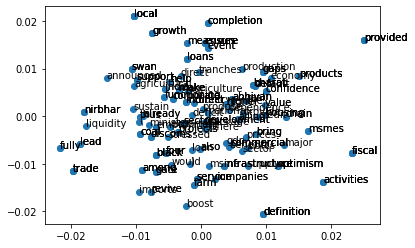

<Figure size 432x1080 with 0 Axes>

In [768]:
plot_w2v(words)